# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Simulation-of-performance-of-polarimeter" data-toc-modified-id="Simulation-of-performance-of-polarimeter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulation of performance of polarimeter</a></div><div class="lev2 toc-item"><a href="#Init-definitions" data-toc-modified-id="Init-definitions-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Init definitions</a></div><div class="lev2 toc-item"><a href="#Parte-numérica" data-toc-modified-id="Parte-numérica-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parte numérica</a></div><div class="lev1 toc-item"><a href="#Parte-experimental" data-toc-modified-id="Parte-experimental-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parte experimental</a></div><div class="lev1 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparación</a></div><div class="lev1 toc-item"><a href="#Ajuste" data-toc-modified-id="Ajuste-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ajuste</a></div><div class="lev2 toc-item"><a href="#Definición-de-funcion-de-ajuste" data-toc-modified-id="Definición-de-funcion-de-ajuste-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Definición de funcion de ajuste</a></div>

# Simulation of performance of polarimeter

We define experimentally polarizers and waveplates (ideal and real) and determine the intensity.
This functions are for calibration.

For linear polarizer I have found a simple way to determine p0 and p1, but for retarder it is not so easy. 

With mathematica I have found several equations and I can check the performance.



## Init definitions

In [1]:
from __future__ import print_function, division

# configuration
%load_ext autoreload
%autoreload 2
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

In [2]:
import polarimeter

In [34]:
# import modules
from phyton_optics import sp, plt, mm, um, nm, degrees, np
import phyton_optics.polarization_stokes as polarization
from phyton_optics.polarization_stokes import (
    intensity, polarized_light, polarizer_linear, quarter_waveplate, rotate_mueller, retarder, vacuum)

from polarimeter.polarimeter import get_light_parameters,get_polarimeter_parameters, polarimeter_matrices, rotate_polarimeter, polarimeter_matrix
from scipy import sin, cos,pi

from pprint import  pprint
np.set_printoptions(precision=4)
sp.set_printoptions(precision=4)

In [4]:
def dibujar_resultado(angles_2, angles_4, Intensidad, title=''):
    
    plt.figure()
    extension=sp.array([angles_2[0], angles_2[-1], angles_4[0], angles_4[-1]])*180/pi
    IDimage = plt.imshow(
        Intensidad,
        interpolation='bilinear',
        aspect='auto',
        origin='lower',
        extent=extension)
    plt.xlabel("$\phi_2$")
    plt.ylabel("$\phi_4$")
    plt.suptitle(title)
    #plt.axis('scaled')
    plt.axis(extension)
    plt.axis('scaled')

    # plt.axis('off')
    plt.colorbar()
    IDimage.set_cmap("magma") # YlGnBu  RdBu

## Parte numérica

In [9]:
#Light source: circular polarization
param_u0, u0 =get_light_parameters()
[amplitude, angle, phase]=param_u0
print(u0)

[[ 4.2206]
 [-0.0243]
 [ 0.0091]
 [ 4.2205]]


In [10]:
pol_param=get_polarimeter_parameters(kind='real')

pprint(pol_param)

[{'p0': 0.132970683165,
  'p1': 0.969223930738,
  'theta_axis': 0.1168707373720443},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0.0},
 {'p0': 0.132970683165, 'p1': 0.969223930738, 'theta_axis': 2.762681672981824}]


In [11]:
# Use polarimeter parameters to generate Mueller Matrices

P = polarimeter_matrices(pol_param, angles=None)

for i in range(len(P)):
    pprint(P[i])

matrix([[ 0.4785,  0.4483,  0.1067,  0.    ],
        [ 0.4483,  0.4598,  0.0788,  0.    ],
        [ 0.1067,  0.0788,  0.1476,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1289]])
matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]])
matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]])
matrix([[ 0.4785,  0.3347, -0.3168,  0.    ],
        [ 0.3347,  0.3133, -0.1746,  0.    ],
        [-0.3168, -0.1746,  0.2941,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1289]])


In [12]:
is_polarizer=[True,True, False,True]
angles=[0,0,0,0*degrees]
u0=polarized_light(amplitude=1,angle=45*degrees, phase=pi/4, pol_degree=1)

intensity_0, M = polarimeter_matrix(P, is_present=is_polarizer, angles=angles, u0=u0)

In [13]:
angles_2=sp.linspace(0, pi/2,11)
angles_4=sp.linspace(0, pi,11)

In [14]:
Angles_2, Angles_4 = sp.meshgrid(angles_2, angles_4)
I_numerica=sp.zeros_like(Angles_2, dtype=float)

for i2, angle_2 in enumerate(angles_2):
    for i4, angle_4 in enumerate(angles_4):
        I_numerica[i2,i4], _ = polarimeter_matrix(P, is_present=is_polarizer, 
                                                 angles=[0,angle_2,0,angle_4], u0=u0)

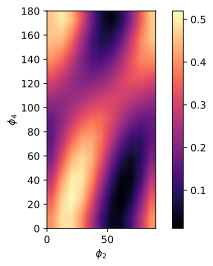

In [15]:
dibujar_resultado(angles_2, angles_4, I_numerica)

# Parte experimental

In [16]:
from scipy.io import savemat, loadmat

In [17]:
# experimental_dict=loadmat('intensities_2_4_180220_angle-polarizer.mat')
experimental_dict=loadmat('experimental_data/intensities_2_4_180305b_angle-polarizer.mat')

In [18]:
angle_2_e=experimental_dict['angle_2']
angle_4_e=experimental_dict['angle_4']
I_experimental=experimental_dict['intensities']
# I_experimental=np.flipud(I_experimental)*0.5/I_experimental.max()
# I_experimental=np.fliplr(I_experimental)*0.5/I_experimental.max()
I_experimental=I_experimental*0.5/I_experimental.max()

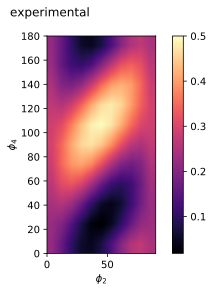

In [19]:
dibujar_resultado(angles_2, angles_4, I_experimental, title='experimental')

# Comparación
Esta comparación no es buena, pues no está optimizada.

El siguiente paso es optimizar y obtener los parámetros

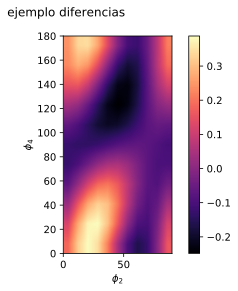

In [20]:
diferencias=I_numerica-I_experimental
dibujar_resultado(angles_2, angles_4, diferencias, title='ejemplo diferencias')   


# Ajuste

Definimos una función que genera la distribución de intensidad, que es la que intentamos optimizar

## Definición de funcion de ajuste

In [21]:
from scipy import optimize

In [22]:
def polarimeter_matrices_parameters(par):
    """Se introducen los parámetros que definen las matrices y devuelve las matrices"""
    p0,p1,a,b, delta, theta_2, theta_4=par
    pol1 = dict(theta_axis=0, p0=p0, p1=p1)
    pol2 = dict(theta_axis=theta_2, a=a, b=b, delta=delta)
    pol3 = dict(theta_axis=0, a=a, b=b, delta=delta)
    pol4 = dict(theta_axis=theta_4, p0=p0, p1=p1)
    
    pol_param=[pol1, pol2, pol3, pol4]
    P = polarimeter_matrices(pol_param, angles=None)
    # pprint(P)
    return P

In [23]:
def polarimeter_behaviour(par):
      
    u0=polarized_light(amplitude=1, angle=0 * degrees, phase=sp.pi/2, pol_degree=1)
    is_polarizer=[True, True, False, True]
    
    P=polarimeter_matrices_parameters(par)
    angles_2=sp.linspace(0, pi/2,11)
    angles_4=sp.linspace(0, pi,11)
    Angles_2, Angles_4 = sp.meshgrid(angles_2, angles_4)
    Intensities=sp.zeros_like(Angles_2, dtype=float)

    for i2, angle_2 in enumerate(angles_2):
        for i4, angle_4 in enumerate(angles_4):
            Intensities[i2,i4], _ = polarimeter_matrix(P, is_present=is_polarizer, 
                                                     angles=[0,angle_2,0,angle_4], u0=u0)
    return Intensities

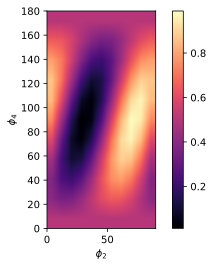

In [24]:
par=[0,1,1,1, pi/2, 45*degrees, 30*degrees]
example=polarimeter_behaviour(par)
dibujar_resultado(angles_2, angles_4, example    )

In [25]:
err_func = lambda p0,p1,a,b, delta, theta_2, theta_4: polarimeter_behaviour(p0,p1,a,b, delta, theta_2, theta_4) - I_experimental # Distance to the target function

In [26]:
# I_experimental=example

In [27]:
def err_func(par):
    return abs(polarimeter_behaviour(par) -I_experimental ).flatten()

In [28]:
par=[0.128242248318,0.946436027636,1,1, pi/2, 134.39*degrees, 70.445*degrees]
error=err_func(par)
print(error.mean())


0.221326207223


In [29]:
#p0,p1,a,b, delta)
params_ini=[0,1, .9, .8, sp.pi/2, 0, 0]

params_ini=[0.128242248318,0.946436027636,1,1, pi/2, 0*degrees, 90.445*degrees]

params_optim, success = optimize.leastsq(err_func, params_ini)
print(params_optim)
print(params_optim*180/sp.pi)

[ 0.4904  0.714   0.4638  1.0432 -3.1416  0.5745  1.5674]
[  28.0984   40.9085   26.5713   59.7703 -179.9999   32.9156   89.8062]


0.0549113951717


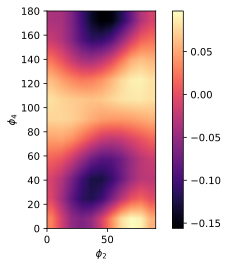

In [30]:
Intensities_fitting = polarimeter_behaviour(params_optim)
residuals= I_experimental - Intensities_fitting
dibujar_resultado(angles_2, angles_4, residuals)    
print(abs(residuals).mean())

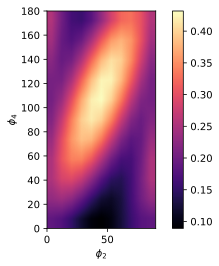

In [31]:
dibujar_resultado(angles_2, angles_4, Intensities_fitting)    


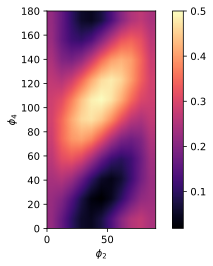

In [32]:
dibujar_resultado(angles_2, angles_4, I_experimental)    


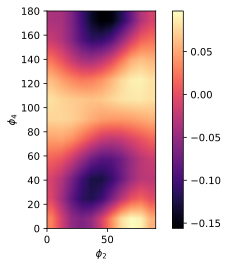

In [33]:
dibujar_resultado(angles_2, angles_4, I_experimental-Intensities_fitting)    
